In [2]:
import warnings
warnings.filterwarnings('ignore')

import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('D:\\ML PROJECT\\dataset.csv')
X = data.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = data['target'] 
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1152, 50), (1152, 8), (288, 50), (288, 8))

In [8]:
import matplotlib as plt
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.1323 - loss: 2.0703 - val_accuracy: 0.1493 - val_loss: 2.0329
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1578 - loss: 2.0117 - val_accuracy: 0.1979 - val_loss: 1.9944
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2453 - loss: 1.9543 - val_accuracy: 0.2326 - val_loss: 1.9552
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3041 - loss: 1.8930 - val_accuracy: 0.2812 - val_loss: 1.9173
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3368 - loss: 1.8517 - val_accuracy: 0.3056 - val_loss: 1.8799
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3634 - loss: 1.7901 - val_accuracy: 0.3576 - val_loss: 1.8474
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3714 - loss: 1.7490 - val_accuracy: 0.3646 - val_loss: 1.8171
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3826 - loss: 1.6994 - val_accuracy: 0.3646 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,586 (205.42 KB)

 Trainable params: 17,528 (68.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,058 (136.95 KB)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5235 - loss: 5.2515 
[5.078023910522461, 0.5243055820465088]


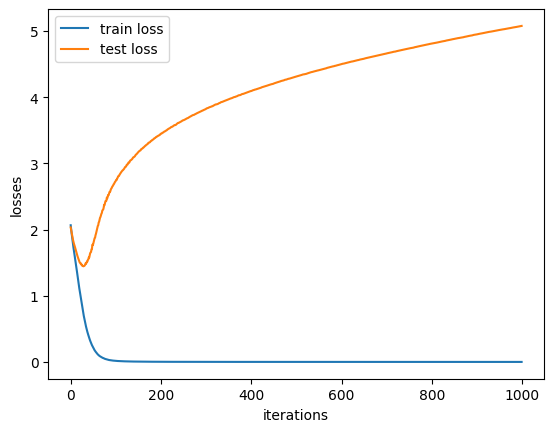

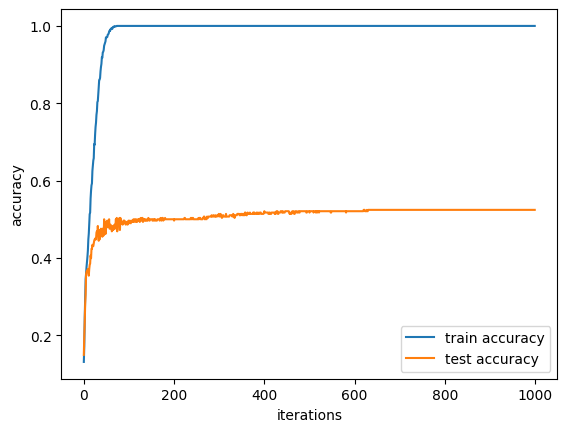

In [9]:
from matplotlib import pyplot as plt
#building MLP model 
from keras import models
from keras import layers
from tensorflow.compat.v1 import ConfigProto  # type: ignore
from tensorflow.compat.v1 import InteractiveSession  # type: ignore

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=256,epochs = 1000,verbose=1,validation_data=(X_test,y_test))

plotter(history)

model.summary()
result = model.evaluate(X_test,y_test)
print(result)

In [3]:
# Emotion mapping
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Ask the user for feature values (ensure the number of inputs matches your model's features)
def get_user_input():
    user_input = []
    for feature in X.columns:  # assuming X is your feature set
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Scale the input data (since you scaled your training data)
def scale_input(input_data, scaler):
    return scaler.transform(input_data)

# Predict emotion class
def predict_emotion(input_data):
    scaled_input = scale_input(input_data, scaler)
    prediction = model.predict(scaled_input)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    
    # Convert the predicted class index to a corresponding emotion
    emotion_code = f"{predicted_class + 1:02}"  # Ensure the key is in '01' format
    emotion = emotions.get(emotion_code, "Unknown emotion")
    
    return emotion

# Main function to collect input and predict
def get():
    print("Please provide the following feature values for prediction.")
    user_input = get_user_input()
    
    # Predict the emotion
    predicted_emotion = predict_emotion(user_input)
    
    print(f"The predicted emotion is: {predicted_emotion}")

# Call the main function
get()


Please provide the following feature values for prediction.


NameError: name 'X' is not defined